# Práctica 6c: estadísticas de validación de clústers

In [1]:
library(factoextra) 
library(clusterCrit)

Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
Warning message:
"package 'clusterCrit' was built under R version 3.5.3"

In [2]:
df <- read.csv('num_mesnajes.csv')

In [3]:
head(df, 6)

minutos,num_mensajes
1,4
2,2
3,6
4,3
9,2
10,4


In [31]:
data <- as.matrix(cbind(as.numeric(df$minutos), as.numeric(df$num_mensajes)))

In [32]:
data

1,4
2,2
3,6
4,3
9,2
10,4
16,1
18,1
19,7
20,2
21,7


In [33]:
#data <- as.matrix(cbind(df$minutos, df$num_mensajes))

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [34]:
dunn_kmeans

[1] 0.004624274 0.002162404 0.003787526 0.005934614 0.006557236 0.008567247
[7] 0.006285394 0.006798397 0.004807192

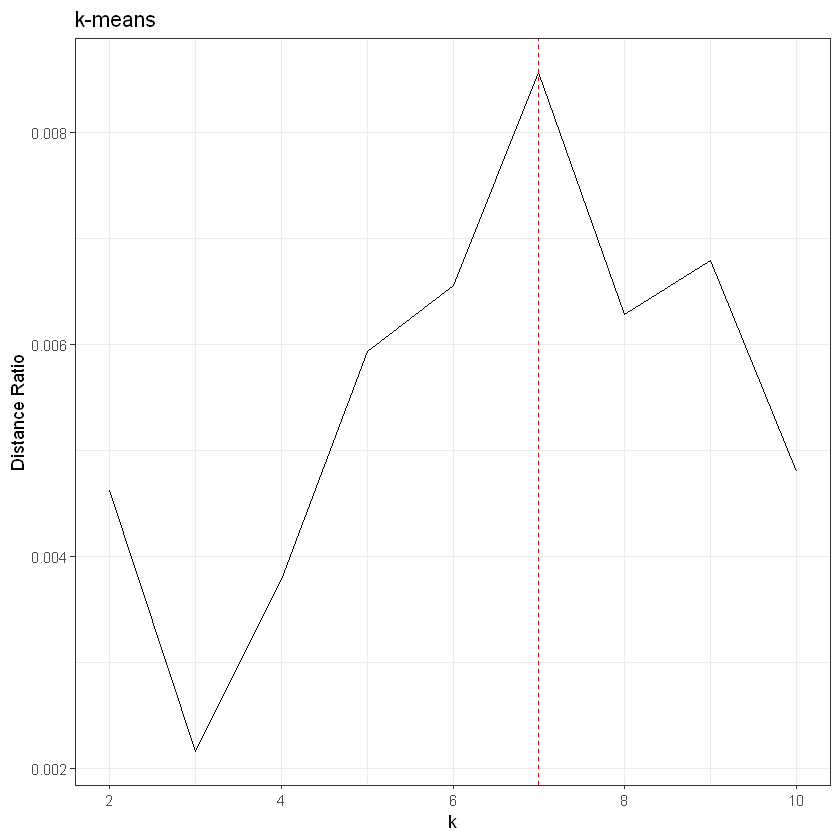

In [35]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

In [46]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

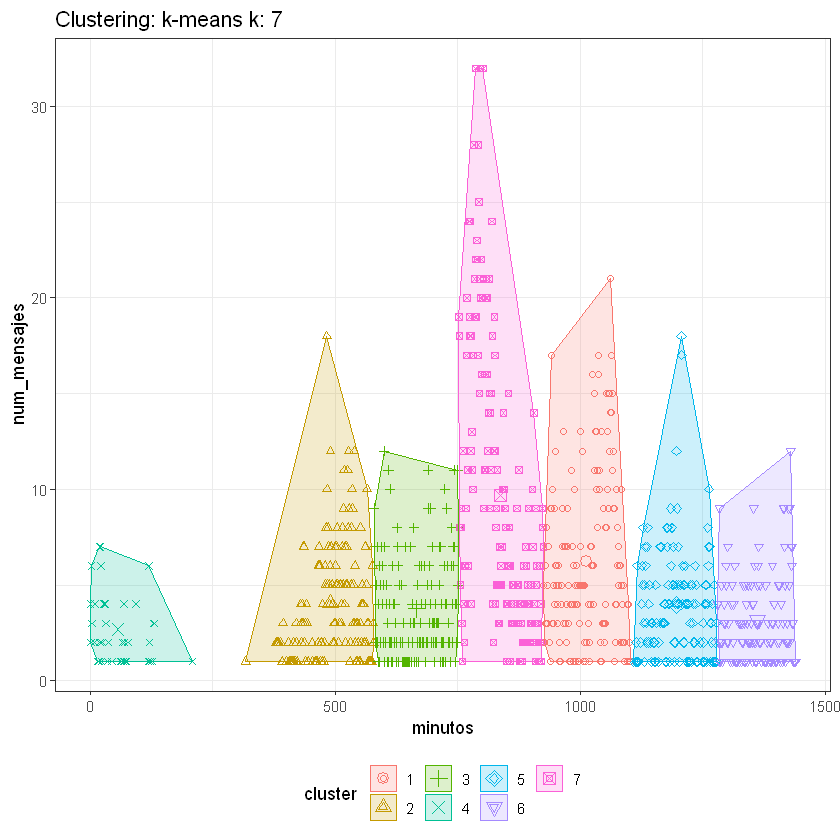

In [50]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = df,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')

plot_kmeans